In [30]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#define problem
problem = mlrose_hiive.ContinuousPeaksGenerator.generate(seed = 42, size = 100, t_pct=0.1)

In [3]:
#run randomized optimization algorithm
rhc = mlrose_hiive.RHCRunner(problem=problem,
                    experiment_name="RHC_ContinuousPeak",
                    output_directory="out",
                    seed=42,
                    iteration_list=2 ** np.arange(13),
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc, df_run_curves_rhc = rhc.run()

In [4]:
# run simulated annealing optimization algorithm
sa = mlrose_hiive.SARunner(problem=problem,
                  experiment_name="SA_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=500,
                  temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                  decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])
    
# the two data frames will contain the results
df_run_stats_sa, df_run_curves_sa = sa.run() 

In [15]:
#run genetic algorithm optimization algorithm
ga = mlrose_hiive.GARunner(problem=problem,
                  experiment_name="GA_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=200,
                  population_sizes=[500, 800, 1000, 1500, 2000, 3000],
                  mutation_rates=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# the two data frames will contain the results
df_run_stats_ga, df_run_curves_ga = ga.run() 

In [16]:
#run mimic optimization algorithm
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                      experiment_name="MMC_ContinuousPeak",
                      output_directory="out",
                      seed=42,
                      iteration_list=2 ** np.arange(13),
                      max_attempts=200,
                      keep_percent_list=[0.25, 0.5, 0.75],
                      population_sizes = [1000, 2000, 3000, 4000, 5000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc, df_run_curves_mmc = mmc.run()

Text(0, 0.5, 'Fitness')

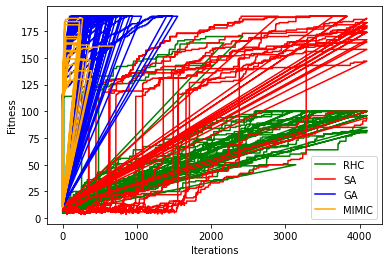

In [17]:
# Plot Iterations vs Fitness
plt.plot(df_run_curves_rhc['Iteration'], df_run_curves_rhc['Fitness'], label='RHC', color='green')
plt.plot(df_run_curves_sa['Iteration'], df_run_curves_sa['Fitness'], label='SA', color='red')
plt.plot(df_run_curves_ga['Iteration'], df_run_curves_ga['Fitness'], label='GA', color='blue')
plt.plot(df_run_curves_mmc['Iteration'], df_run_curves_mmc['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

In [18]:
# Plot Iterations vs Fitness
df_stats_rhc_best = df_run_stats_rhc.loc[(df_run_stats_rhc['Restarts']==25) & (df_run_stats_rhc['current_restart']==16)]
df_stats_sa_best = df_run_stats_sa.loc[(df_run_stats_sa['schedule_type']=='exponential') & (df_run_stats_sa['schedule_init_temp']==10)]
df_stats_ga_best = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==500) & (df_run_stats_ga['Mutation Rate']==0.2)]
df_stats_mmc_best = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==4000) & (df_run_stats_mmc['Keep Percent']==0.25)]

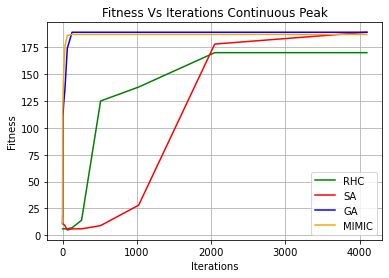

In [42]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['Fitness'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['Fitness'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['Fitness'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.grid()
plt.title("Fitness Vs Iterations Continuous Peak")
plt.savefig("Fitness Vs Iterations Continuous Peak")

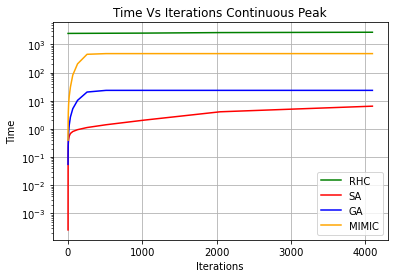

In [43]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['Time'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['Time'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['Time'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['Time'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Time")
plt.yscale('log')
plt.grid()
plt.title("Time Vs Iterations Continuous Peak")
plt.savefig("Time Vs Iterations Continuous Peak")

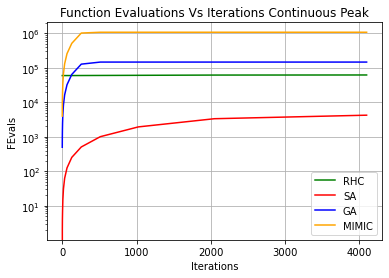

In [44]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['FEvals'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['FEvals'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['FEvals'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['FEvals'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("FEvals")
plt.yscale('log')
plt.grid()
plt.title("Function Evaluations Vs Iterations Continuous Peak")
plt.savefig("Function Evaluations Vs Iterations Continuous Peak")

In [24]:
problem1 = mlrose_hiive.ContinuousPeaksGenerator.generate(seed = 42, size = 20, t_pct=0.1)
problem2 = mlrose_hiive.ContinuousPeaksGenerator.generate(seed = 42, size = 40, t_pct=0.1)
problem3 = mlrose_hiive.ContinuousPeaksGenerator.generate(seed = 42, size = 60, t_pct=0.1)
problem4 = mlrose_hiive.ContinuousPeaksGenerator.generate(seed = 42, size = 80, t_pct=0.1)
problem5 = mlrose_hiive.ContinuousPeaksGenerator.generate(seed = 42, size = 100, t_pct=0.1)

In [25]:
#run randomized optimization algorithm
rhc1 = mlrose_hiive.RHCRunner(problem=problem1,
                    experiment_name="RHC1_ContinuousPeak",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc1, df_run_curves_rhc1 = rhc1.run()

rhc2 = mlrose_hiive.RHCRunner(problem=problem2,
                    experiment_name="RHC2_ContinuousPeak",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc2, df_run_curves_rhc2 = rhc2.run()

rhc3 = mlrose_hiive.RHCRunner(problem=problem3,
                    experiment_name="RHC3_ContinuousPeak",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc3, df_run_curves_rhc3 = rhc3.run()

rhc4 = mlrose_hiive.RHCRunner(problem=problem4,
                    experiment_name="RHC4_ContinuousPeak",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc4, df_run_curves_rhc4 = rhc4.run()

rhc5 = mlrose_hiive.RHCRunner(problem=problem5,
                    experiment_name="RHC5_ContinuousPeak",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[25])
df_run_stats_rhc5, df_run_curves_rhc5 = rhc5.run()

In [26]:
# run simulated annealing optimization algorithm
sa1 = mlrose_hiive.SARunner(problem=problem1,
                  experiment_name="SA1_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[10],
                  decay_list=[mlrose_hiive.ExpDecay])
    
# the two data frames will contain the results
df_run_stats_sa1, df_run_curves_sa1 = sa1.run() 

sa2 = mlrose_hiive.SARunner(problem=problem2,
                  experiment_name="SA2_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[10],
                  decay_list=[mlrose_hiive.ExpDecay])
    
# the two data frames will contain the results
df_run_stats_sa2, df_run_curves_sa2 = sa2.run() 

sa3 = mlrose_hiive.SARunner(problem=problem3,
                  experiment_name="SA3_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[10],
                  decay_list=[mlrose_hiive.ExpDecay])
    
# the two data frames will contain the results
df_run_stats_sa3, df_run_curves_sa3 = sa3.run() 

sa4 = mlrose_hiive.SARunner(problem=problem4,
                  experiment_name="SA4_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[10],
                  decay_list=[mlrose_hiive.ExpDecay])
    
# the two data frames will contain the results
df_run_stats_sa4, df_run_curves_sa4 = sa4.run() 

sa5 = mlrose_hiive.SARunner(problem=problem5,
                  experiment_name="SA5_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[10],
                  decay_list=[mlrose_hiive.ExpDecay])
    
# the two data frames will contain the results
df_run_stats_sa5, df_run_curves_sa5 = sa5.run() 

In [27]:
#run genetic algorithm optimization algorithm
ga1 = mlrose_hiive.GARunner(problem=problem1,
                  experiment_name="GA1_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[500],
                  mutation_rates=[0.2])

# the two data frames will contain the results
df_run_stats_ga1, df_run_curves_ga1 = ga1.run() 

ga2 = mlrose_hiive.GARunner(problem=problem2,
                  experiment_name="GA2_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[500],
                  mutation_rates=[0.2])

# the two data frames will contain the results
df_run_stats_ga2, df_run_curves_ga2 = ga2.run() 

ga3 = mlrose_hiive.GARunner(problem=problem3,
                  experiment_name="GA3_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[500],
                  mutation_rates=[0.2])

# the two data frames will contain the results
df_run_stats_ga3, df_run_curves_ga3 = ga3.run() 

ga4 = mlrose_hiive.GARunner(problem=problem4,
                  experiment_name="GA4_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[500],
                  mutation_rates=[0.2])

# the two data frames will contain the results
df_run_stats_ga4, df_run_curves_ga4 = ga4.run() 

ga5 = mlrose_hiive.GARunner(problem=problem5,
                  experiment_name="GA5_ContinuousPeak",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[500],
                  mutation_rates=[0.2])

# the two data frames will contain the results
df_run_stats_ga5, df_run_curves_ga5 = ga5.run() 

In [28]:
#run mimic optimization algorithm
mmc1 = mlrose_hiive.MIMICRunner(problem=problem1,
                      experiment_name="MMC1_ContinuousPeak",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [4000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc1, df_run_curves_mmc1 = mmc1.run()

mmc2 = mlrose_hiive.MIMICRunner(problem=problem2,
                      experiment_name="MMC2_ContinuousPeak",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [4000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc2, df_run_curves_mmc1 = mmc2.run()

mmc3 = mlrose_hiive.MIMICRunner(problem=problem3,
                      experiment_name="MMC3_ContinuousPeak",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [4000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc3, df_run_curves_mmc3 = mmc3.run()

mmc4 = mlrose_hiive.MIMICRunner(problem=problem4,
                      experiment_name="MMC4_ContinuousPeak",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [4000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc4, df_run_curves_mmc4 = mmc4.run()

mmc5 = mlrose_hiive.MIMICRunner(problem=problem5,
                      experiment_name="MMC5_ContinuousPeak",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.25],
                      population_sizes = [4000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc5, df_run_curves_mmc5 = mmc5.run()

In [31]:
data_rhc = [{'Problem Size': 20, 'Fitness': df_run_stats_rhc1['Fitness'].max()},
           {'Problem Size': 40, 'Fitness': df_run_stats_rhc2['Fitness'].max()},
           {'Problem Size': 60, 'Fitness': df_run_stats_rhc3['Fitness'].max()},
           {'Problem Size': 80, 'Fitness': df_run_stats_rhc4['Fitness'].max()},
           {'Problem Size': 100, 'Fitness': df_run_stats_rhc5['Fitness'].max()}]
df_rhc = pd.DataFrame(data_rhc)

In [32]:
data_sa = [{'Problem Size': 20, 'Fitness': df_run_stats_sa1['Fitness'].max()},
           {'Problem Size': 40, 'Fitness': df_run_stats_sa2['Fitness'].max()},
           {'Problem Size': 60, 'Fitness': df_run_stats_sa3['Fitness'].max()},
           {'Problem Size': 80, 'Fitness': df_run_stats_sa4['Fitness'].max()},
           {'Problem Size': 100, 'Fitness': df_run_stats_sa5['Fitness'].max()}]
df_sa = pd.DataFrame(data_sa)

In [33]:
data_ga = [{'Problem Size': 20, 'Fitness': df_run_stats_ga1['Fitness'].max()},
           {'Problem Size': 40, 'Fitness': df_run_stats_ga2['Fitness'].max()},
           {'Problem Size': 60, 'Fitness': df_run_stats_ga3['Fitness'].max()},
           {'Problem Size': 80, 'Fitness': df_run_stats_ga4['Fitness'].max()},
           {'Problem Size': 100, 'Fitness': df_run_stats_ga5['Fitness'].max()}]
df_ga = pd.DataFrame(data_ga)

In [34]:
data_mmc = [{'Problem Size': 20, 'Fitness': df_run_stats_mmc1['Fitness'].max()},
           {'Problem Size': 40, 'Fitness': df_run_stats_mmc2['Fitness'].max()},
           {'Problem Size': 60, 'Fitness': df_run_stats_mmc3['Fitness'].max()},
           {'Problem Size': 80, 'Fitness': df_run_stats_mmc4['Fitness'].max()},
           {'Problem Size': 100, 'Fitness': df_run_stats_mmc5['Fitness'].max()}]
df_mmc = pd.DataFrame(data_mmc)

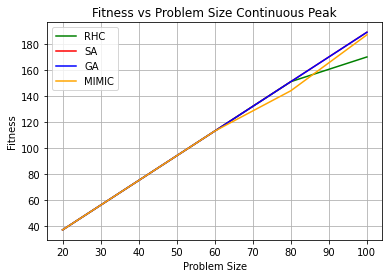

In [45]:
plt.plot(df_rhc['Problem Size'], df_rhc['Fitness'], label='RHC', color='green')
plt.plot(df_sa['Problem Size'], df_sa['Fitness'], label='SA', color='red')
plt.plot(df_ga['Problem Size'], df_ga['Fitness'], label='GA', color='blue')
plt.plot(df_mmc['Problem Size'], df_mmc['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Problem Size")
plt.ylabel("Fitness")
plt.grid()
plt.title("Fitness vs Problem Size Continuous Peak")
plt.savefig("Fitness vs Problem Size Continuous Peak")

In [48]:
# [500, 800, 1000, 1500, 2000, 3000
df_popsize_ga_200 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==500) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=256)]
df_popsize_ga_500 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==800) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=256)]
df_popsize_ga_1000 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==1000) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=256)]
df_popsize_ga_2000 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==1500) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=256)]
df_popsize_ga_3000 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==2000) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=256)]
df_popsize_ga_4000 = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==3000) & (df_run_stats_ga['Mutation Rate']==0.1) & (df_run_stats_ga['Iteration']<=256)]

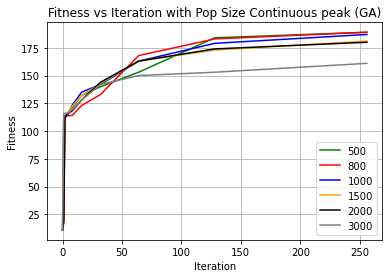

In [50]:
plt.plot(df_popsize_ga_200['Iteration'], df_popsize_ga_200['Fitness'], label='500', color='green')
plt.plot(df_popsize_ga_500['Iteration'], df_popsize_ga_500['Fitness'], label='800', color='red')
plt.plot(df_popsize_ga_1000['Iteration'], df_popsize_ga_1000['Fitness'], label='1000', color='blue')
plt.plot(df_popsize_ga_2000['Iteration'], df_popsize_ga_2000['Fitness'], label='1500', color='orange')
plt.plot(df_popsize_ga_3000['Iteration'], df_popsize_ga_3000['Fitness'], label='2000', color='black')
plt.plot(df_popsize_ga_4000['Iteration'], df_popsize_ga_4000['Fitness'], label='3000', color='grey')
plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.grid()
plt.title("Fitness vs Iteration with Pop Size Continuous peak (GA)")
plt.savefig("Fitness vs Iteration with Pop Size Continuous Peak (GA)")